导入相应的库和数据集

In [11]:
import pandas as pd

In [12]:
spotify_data = pd.read_csv("Spotify_data.csv")

In [13]:
print(spotify_data.head())

   Unnamed: 0                  Track Name  \
0           0                 Not Like Us   
1           1                     Houdini   
2           2  BAND4BAND (feat. Lil Baby)   
3           3          I Don't Wanna Wait   
4           4                       Pedro   

                                   Artists                  Album Name  \
0                           Kendrick Lamar                 Not Like Us   
1                                   Eminem                     Houdini   
2                    Central Cee, Lil Baby  BAND4BAND (feat. Lil Baby)   
3                David Guetta, OneRepublic          I Don't Wanna Wait   
4  Jaxomy, Agatino Romero, Raffaella Carrà                       Pedro   

                 Album ID                Track ID  Popularity Release Date  \
0  5JjnoGJyOxfSZUZtk2rRwZ  6AI3ezQ4o3HUoP6Dhudph3          96   2024-05-04   
1  6Xuu2z00jxRPZei4IJ9neK  2HYFX63wP3otVIvopRS99Z          94   2024-05-31   
2  4AzPr5SUpNF553eC1d3aRy  7iabz12vAuVQYyekFIWJxD 

数据集有一个未命名的列将其删除

In [14]:
spotify_data.drop(columns=['Unnamed: 0'],inplace=True)

In [19]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track Name        227 non-null    object 
 1   Artists           227 non-null    object 
 2   Album Name        227 non-null    object 
 3   Album ID          227 non-null    object 
 4   Track ID          227 non-null    object 
 5   Popularity        227 non-null    int64  
 6   Release Date      227 non-null    object 
 7   Duration (ms)     227 non-null    int64  
 8   Explicit          227 non-null    bool   
 9   External URLs     227 non-null    object 
 10  Danceability      227 non-null    float64
 11  Energy            227 non-null    float64
 12  Key               227 non-null    int64  
 13  Loudness          227 non-null    float64
 14  Mode              227 non-null    int64  
 15  Speechiness       227 non-null    float64
 16  Acousticness      227 non-null    float64
 1

让我们开始 EDA（探索性数据分析），由于流行度是目标变量，我将研究所有音乐特征与流行度之间的关系：


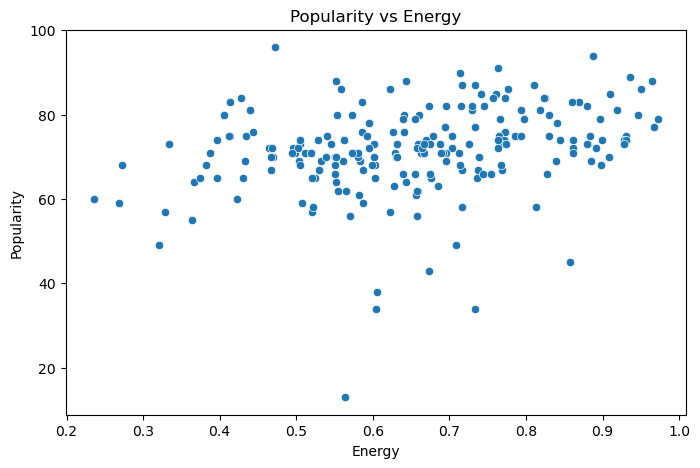

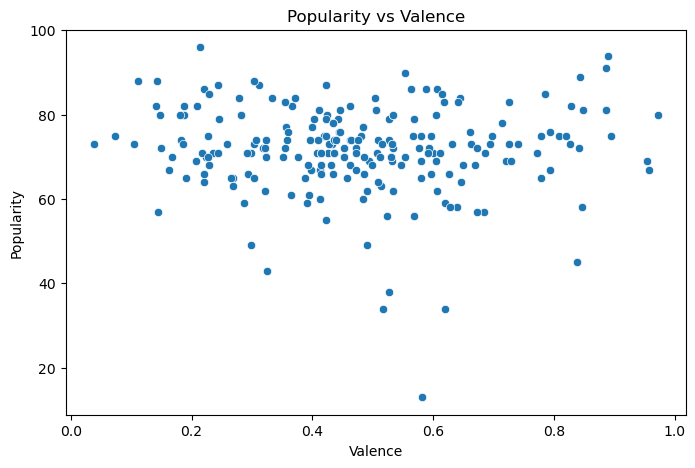

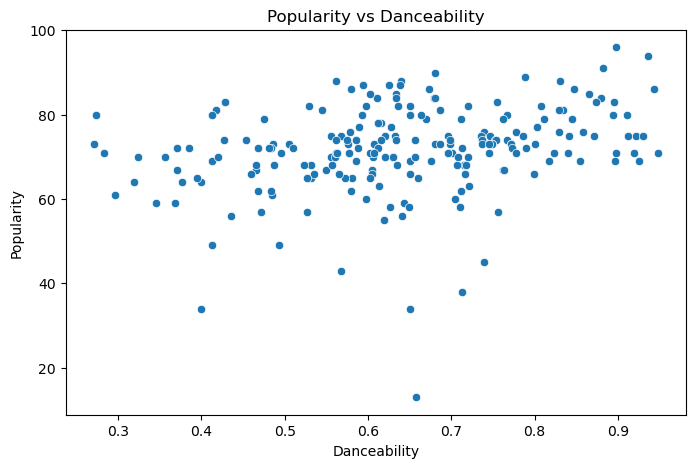

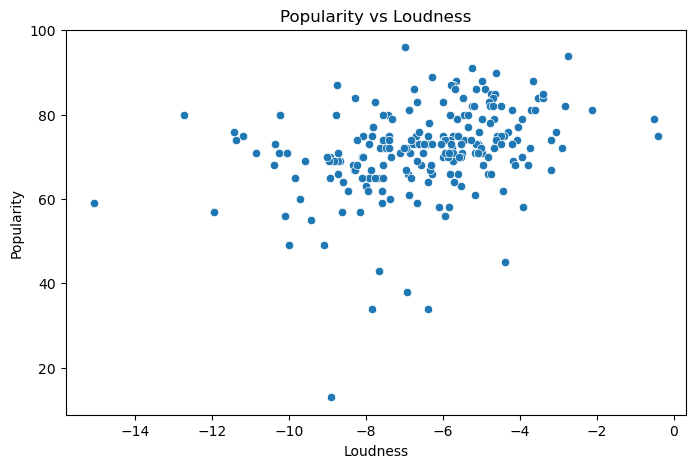

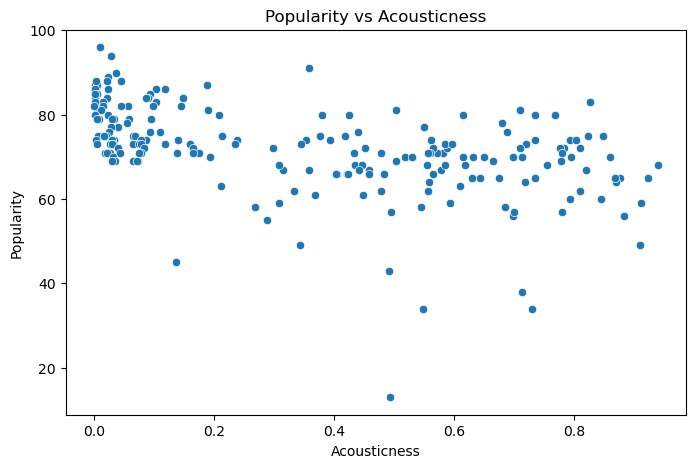

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
# Energy（能量），Valence（情绪），Acousticness（原声度）
# Danceability（舞蹈性），Loudness（响度）
features = ['Energy','Valence','Danceability','Loudness','Acousticness']
for feature in features:
    # 创建一个宽为8，高为5英寸的图形窗口
    plt.figure(figsize=(8,5))
    # seaborn库绘制散点图,data-数据来源，x-指定x轴的数据，y-指定y轴的数据
    sns.scatterplot(data=spotify_data,x=feature,y='Popularity')
    # 设置标题 使用f-string格式化字符串，标题动态变化
    plt.title(f'Popularity vs {feature}')
    # 显示图形
    plt.show()



从上面结果我们可以观察到，更高的能量水平和舞蹈性往往与更高的流行度得分呈正相关。相反，更高的原生性和更低的响度通常与更低的流行度相对应，这表明人们更倾向于选择能量更高、声学性更低的曲目。情绪与流行度的关系较弱，也不太清晰，这表明单凭曲目的情感积极性并不能很好地预测其流行度。

所有特征之间的相关性，计算数据集中所有数值型列两两之间的相关系数，并通过一个着色的热力图（Heatmap）将其直观地可视化出来，以便快速识别出高度相关或高度不相关的变量。

.corr() 是Pandas DataFrame的一个方法，用于计算所有列两两之间的相关系数。

它默认使用皮尔逊相关系数（Pearson Correlation Coefficient），其值介于 -1 和 1 之间：

1：表示完全正相关（一个变量增加，另一个也严格按比例增加）。

-1：表示完全负相关（一个变量增加，另一个严格按比例减少）。

0：表示没有线性相关性。

d:\devtool\Studytool\anaconda3\envs\HEALTH\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\devtool\Studytool\anaconda3\envs\HEALTH\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\devtool\Studytool\anaconda3\envs\HEALTH\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\devtool\Studytool\anaconda3\envs\HEALTH\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\devtool\Studytool\anaconda3\envs\HEALTH\Lib\site-packages\IPython\core\pylabtools.py:170:

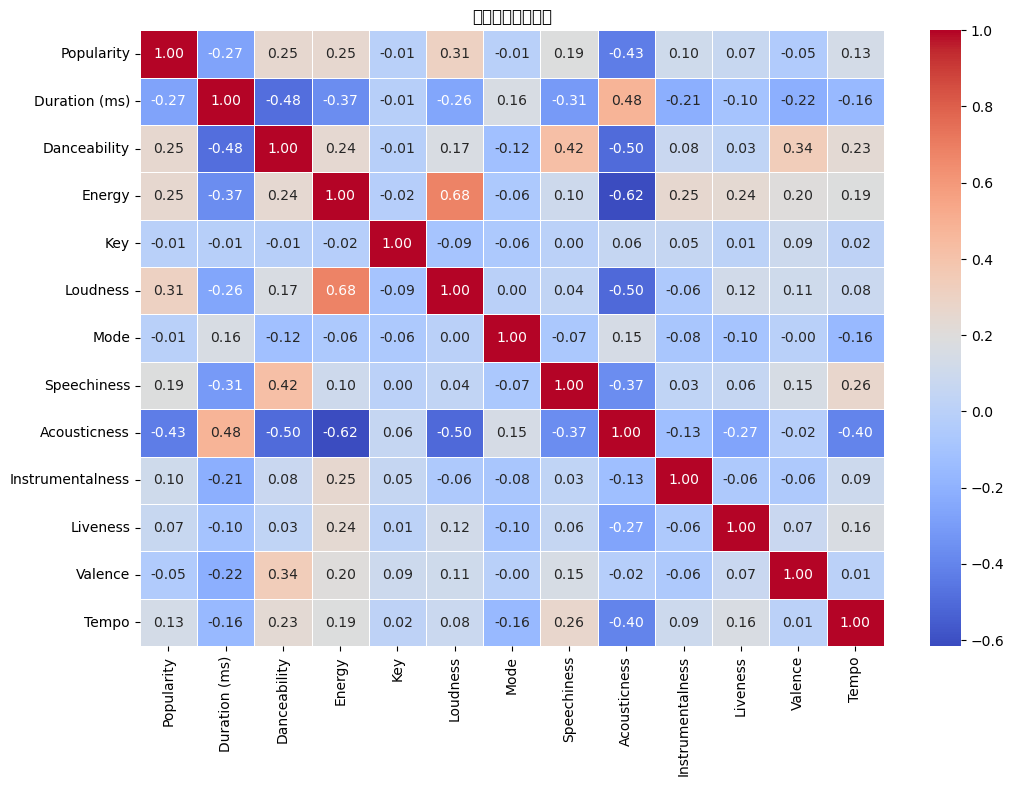

In [22]:
# 选取所有的数值列
numeric_columns = spotify_data.select_dtypes(include=['float64','int64']).columns
# 创建一个只包含数值数据的新DataFrame
numeric_data = spotify_data[numeric_columns]
# 计算相关系数矩阵
corr_matrix = numeric_data.corr()
# 设置图形大小
plt.figure(figsize=(12,8))
# 绘制热力图
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidth=0.5)
# 添加标题
plt.title("特性相关性热力图")
plt.show()

从上面的相关矩阵可以看出，流行度与响度（0.31）和舞动性（0.25）呈中等正相关，这表明响度越高、舞动性越强的曲目往往更受欢迎。流行度与声学性（-0.43）呈中等负相关，这表明声学性越高的曲目通常受欢迎程度较低。能量也与流行度呈正相关（0.25）。

所有音乐特征的分布情况

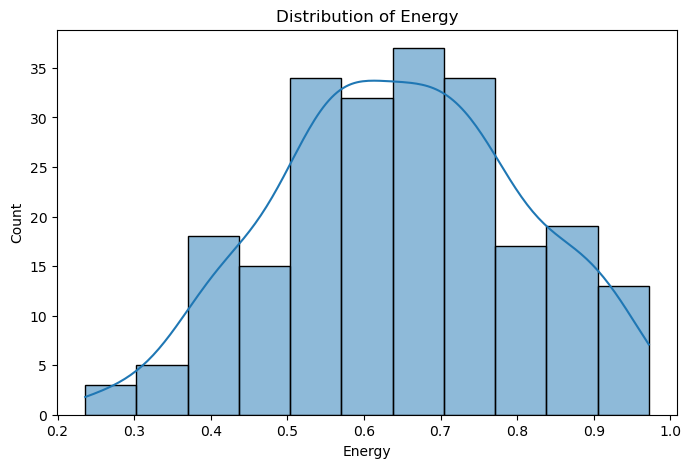

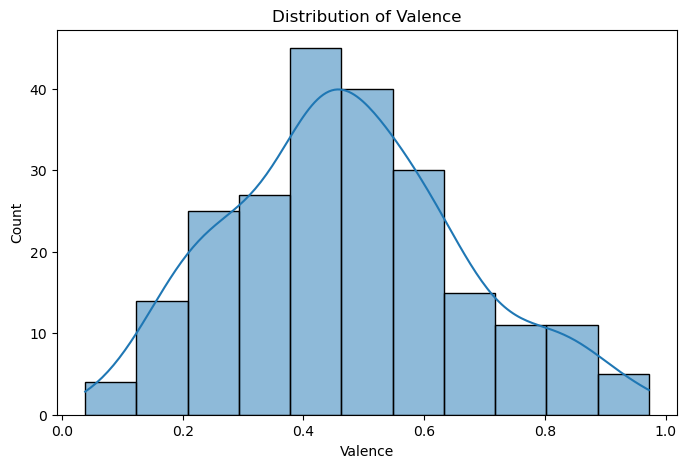

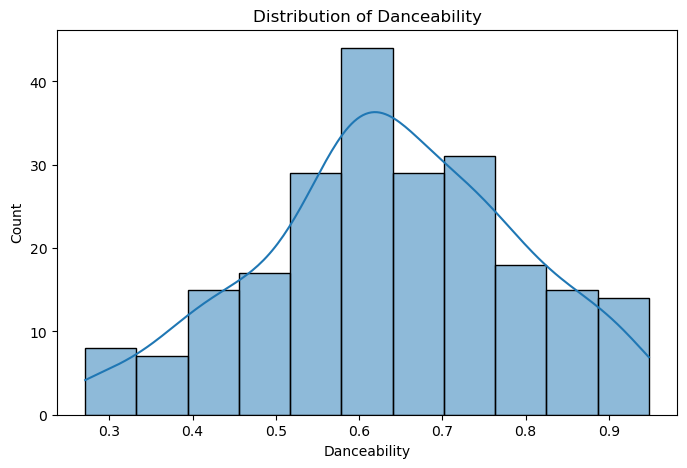

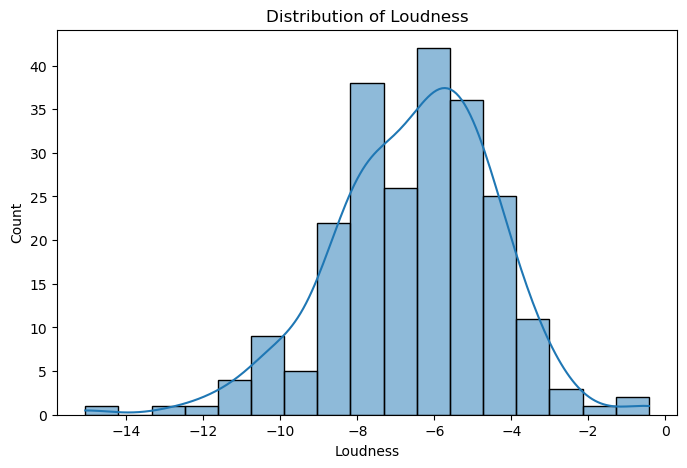

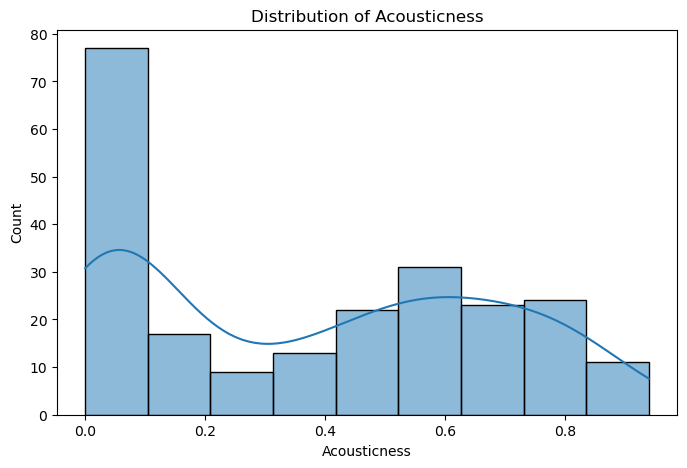

In [23]:
for feature in features:
    plt.figure(figsize=(8,5))
    sns.histplot(spotify_data[feature],kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

能量分布大致呈钟形，表明曲目中的能量水平处于均衡范围。效价和舞动性也遵循类似的分布，大多数曲目的数值处于中等水平，这表明情绪积极和舞动性曲目的比例均衡。响度分布接近正态分布，中心点在-6 dB左右，这反映了数据集中的典型音量水平。然而，声学性则偏向较低值，表明大多数曲目的声学性并不高。


特征选择和模型训练

特征选取：
Energy - 能量
Valence - 情绪效价
Danceability - 舞蹈性
Loudness - 响度
Acousticness - 原声度
Tempo - 速度
Speechiness - 言语度
Liveness - 现场感


模型训练
对数据进行分割和缩放，然后使用随机森林回归算法来训练模型：

In [30]:
# 从sklearn库中导入必要的模块
# 你缺少这行导入语句
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
# 选择特征变量和目标变量
features = ['Energy', 'Valence', 'Danceability', 'Loudness', 'Acousticness', 'Tempo', 'Speechiness', 'Liveness']
x = spotify_data[features] # 特征变量（自变量）
y = spotify_data['Popularity'] # 目标变量 (因变量 - 歌曲流行度)
# 将数据集划分为训练集和测试集
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
# test_size=0.2 表示20%的数据作为测试集，80%作为训练集
# random_state=42 设置随机种子，确保每次划分的结果一致，便于复现
# 标准化/归一化特征数据
scaler = StandardScaler() #创建标准化器实例
x_train_scaled = scaler.fit_transform(x_train) # 在训练集计算均值和标准差，并应用转换
x_test_scaled = scaler.transform(x_test)
# print(x_train.head())
# print(x_train_scaled)
# 定义随机森林模型的超参数网络
param_grid = {
    'n_estimators':[50,100,200],#森林中数的数量
    'max_features':[None,'sqrt','log2'],#寻找最佳分割时考虑的特征数
    'max_depth':[10,20,30,None],#树的最大深度
    'min_samples_split': [2, 5, 10],  # 分裂内部节点所需的最小样本数
    'min_samples_leaf': [1, 2, 4]  # 叶节点所需的最小样本数
}

# 创建网格搜索对象
grid_search_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),  # 基础估计器（随机森林回归器）
    param_grid,  # 要搜索的参数网格
    refit=True,   # 找到最佳参数后，用整个训练集重新拟合最佳估计器
    verbose=2,    # 输出详细程度（数值越大越详细）
    cv=5          # 5折交叉验证
)

# 在训练数据上执行网格搜索以找到最佳参数
grid_search_rf.fit(x_train_scaled, y_train)

# 获取网格搜索找到的最佳参数组合
best_params_rf = grid_search_rf.best_params_

# 获取网格搜索得到的最佳估计器模型（已用最佳参数重新拟合）
best_rf_model = grid_search_rf.best_estimator_

# 使用最佳模型对测试集进行预测
y_pred_best_rf = best_rf_model.predict(x_test_scaled)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; 

随机森林算法的性能优于其他算法,看一下测试数据的实际结果与预测结果

d:\devtool\Studytool\anaconda3\envs\HEALTH\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\devtool\Studytool\anaconda3\envs\HEALTH\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\devtool\Studytool\anaconda3\envs\HEALTH\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21463 (\N{CJK UNIFIED IDEOGRAPH-53D7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\devtool\Studytool\anaconda3\envs\HEALTH\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27426 (\N{CJK UNIFIED IDEOGRAPH-6B22}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\devtool\Studytool\anaconda3\envs\HEALTH\Lib\site-packages\IPython\core\pylabtools.py:170:

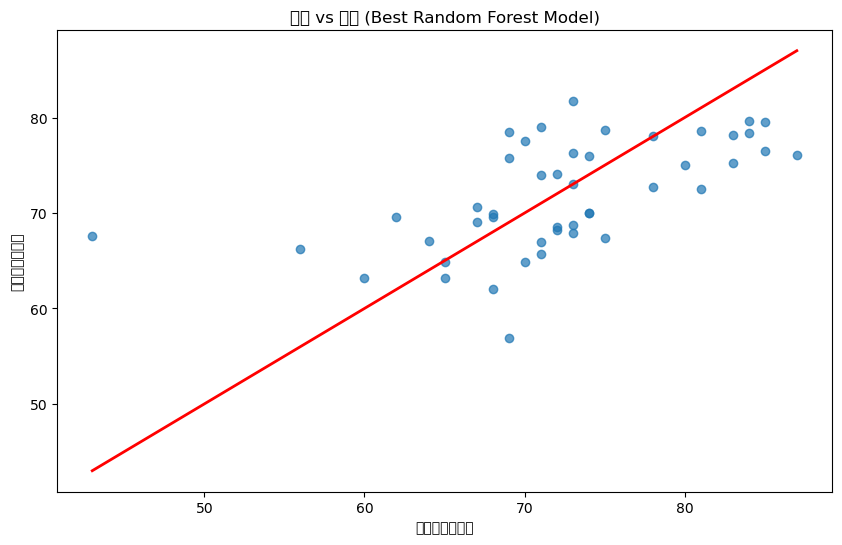

In [31]:
#做出预测
y_pred_best_rf = best_rf_model.predict(x_test_scaled)

plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_best_rf,alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('实际受欢迎程度')
plt.ylabel('预测受欢迎程度')
plt.title('实际 vs 预测 (Best Random Forest Model)')
plt.show()


红线表示完美预测，预测的流行度与实际流行度完全匹配。大多数点都聚集在这条线周围，这表明该模型的预测相当准确。然而，也存在一些偏差，尤其是在流行度值较低的情况下，这表明模型的预测在某些方面不太准确。

Python 训练机器学习模型来预测音乐流行度的方法。预测音乐的流行度可以帮助音乐流媒体平台了解用户偏好，优化播放列表并增强推荐系统，从而提高用户参与度和满意度。